In [1]:
import numpy as np
import tqdm
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from scipy.spatial import distance
from sklearn.metrics import calinski_harabaz_score, silhouette_score
from sklearn.cluster import DBSCAN, KMeans, SpectralClustering
from scipy.spatial import distance

In [2]:
# paths to the databases containing the PCA and Isomap projections 

paths = [
    #"./pivot_o.csv", 
    #"./pivot_f.csv", 
    #"./pivot_g.csv", 
    "./proj_o.csv",
    "./proj_f.csv", 
    "./proj_g.csv",
    "./isomap_o_dim5.csv"
]

In [3]:
datasets = [np.genfromtxt(path, delimiter=';') for path in paths]

In [4]:
datasets[3]

array([[-0.0538136 ,  0.33322081,  0.03994823, -0.00802298,  0.02154262],
       [-0.18348114, -0.07652568, -0.00610664,  0.03397499,  0.00138245],
       [-0.2844246 , -0.26008137, -0.00803431,  0.00938736, -0.01818483],
       ...,
       [-0.30795715, -0.67117225, -0.27031599, -0.26169485, -0.19179656],
       [-0.1270504 ,  0.33897461,  0.06275514,  0.13345009, -0.0737062 ],
       [-0.19206462, -0.18906588, -0.01211015,  0.05938444,  0.01226094]])

In [5]:
# Davies Bouldin Index

def DB_index(X, clusters_centers, labels):
    if -1 in labels:
        X = X[labels != -1]
        labels = labels[labels != -1]
        
        #print(len(labels), X.shape)
        
        
    n_clusters = len(clusters_centers)
    
    d = np.array([distance.euclidean(X[i], clusters_centers[labels[i]]) for i in range(len(X))])
    
    mean_dist = np.zeros(n_clusters)
    for i in range(n_clusters):
        mean_dist[i] = d[labels == i].mean()
    
    return sum([max([(mean_dist[i] + mean_dist[j]) / distance.euclidean(clusters_centers[i], clusters_centers[j]) 
         for i in range(n_clusters) if i != j]) for j in range(n_clusters)]) / n_clusters

In [6]:
# Clusters centers

def cl_centers(X, pred, n_cl=None):
    if n_cl is None:
        n_cl = len(set(pred))
        if -1 in pred:
            n_cl -= 1
        
    centers = np.zeros((n_cl, X.shape[1]))
    
    for i in range(n_cl):
        centers[i] = X[pred == i].mean(0)
        
    return centers

In [51]:
# Performing DBScan clustering

all_dbscan_indexes = []
for dataset, label in zip(datasets, paths):
    print(label.split("/")[-1].split(".")[0])
    indexes = []
    for eps in tqdm.tqdm_notebook(np.linspace(0.1, 0.3, 10)):
        dbscan = DBSCAN(eps)
        #dbscan.fit(dataset)
        pred = dbscan.fit_predict(dataset)
        if max(pred) > 0:
            centers = cl_centers(dataset, pred)

            ind = DB_index(dataset, centers, pred)
            print("shape: ", dataset.shape)
            print("dbscan eps: ", eps)
            print("Davies-Bouldin index, silhouette_score: ", ind, silhouette_score(dataset, pred))
            print("Classified_samples, classes: ", (pred != -1).sum(), max(pred))
            indexes.append(ind)
        else:
            indexes.append(-1)
    
    all_dbscan_indexes.append(indexes)

proj_o


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


shape:  (14098, 20)
dbscan eps:  0.1
Davies-Bouldin index, silhouette_score:  0.6385646271052686 -0.05323252643545829
Classified_samples, classes:  12156 30
shape:  (14098, 20)
dbscan eps:  0.12222222222222223
Davies-Bouldin index, silhouette_score:  0.6580493454759826 0.023923358841361327
Classified_samples, classes:  12701 26
shape:  (14098, 20)
dbscan eps:  0.14444444444444443
Davies-Bouldin index, silhouette_score:  0.6908177651473465 0.2075797072679897
Classified_samples, classes:  13089 19
shape:  (14098, 20)
dbscan eps:  0.16666666666666666
Davies-Bouldin index, silhouette_score:  0.714442807129645 0.0482264330433327
Classified_samples, classes:  13439 14
shape:  (14098, 20)
dbscan eps:  0.18888888888888888
Davies-Bouldin index, silhouette_score:  0.6702224370809263 0.19615549213496314
Classified_samples, classes:  13689 10
shape:  (14098, 20)
dbscan eps:  0.2111111111111111
Davies-Bouldin index, silhouette_score:  0.6101183131760897 0.30889995602752857
Classified_samples, class

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


shape:  (14098, 42)
dbscan eps:  0.1
Davies-Bouldin index, silhouette_score:  0.6017818479901288 -0.27999734615154304
Classified_samples, classes:  9535 25
shape:  (14098, 42)
dbscan eps:  0.12222222222222223
Davies-Bouldin index, silhouette_score:  0.702307613236765 -0.097339492957586
Classified_samples, classes:  10921 39
shape:  (14098, 42)
dbscan eps:  0.14444444444444443
Davies-Bouldin index, silhouette_score:  0.7248581112104361 -0.0837214702346404
Classified_samples, classes:  11840 31
shape:  (14098, 42)
dbscan eps:  0.16666666666666666
Davies-Bouldin index, silhouette_score:  0.7757901199380006 -0.012046668725196436
Classified_samples, classes:  12497 22
shape:  (14098, 42)
dbscan eps:  0.18888888888888888
Davies-Bouldin index, silhouette_score:  0.6737063404754113 0.06300218628914092
Classified_samples, classes:  13010 14
shape:  (14098, 42)
dbscan eps:  0.2111111111111111
Davies-Bouldin index, silhouette_score:  0.7128968729102277 0.1345189293147622
Classified_samples, class

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


shape:  (14098, 68)
dbscan eps:  0.1
Davies-Bouldin index, silhouette_score:  0.679761163333121 -0.15189634200252147
Classified_samples, classes:  9640 25
shape:  (14098, 68)
dbscan eps:  0.12222222222222223
Davies-Bouldin index, silhouette_score:  0.7918349079270048 -0.22119342494983674
Classified_samples, classes:  11119 31
shape:  (14098, 68)
dbscan eps:  0.14444444444444443
Davies-Bouldin index, silhouette_score:  0.8618204565588556 -0.08792303692191383
Classified_samples, classes:  12118 32
shape:  (14098, 68)
dbscan eps:  0.16666666666666666
Davies-Bouldin index, silhouette_score:  0.8426488684826633 -0.19177487433421705
Classified_samples, classes:  12833 20
shape:  (14098, 68)
dbscan eps:  0.18888888888888888
Davies-Bouldin index, silhouette_score:  0.7694188411303694 0.03441402782267471
Classified_samples, classes:  13311 16
shape:  (14098, 68)
dbscan eps:  0.2111111111111111
Davies-Bouldin index, silhouette_score:  0.7029007245718443 0.11509466463817093
Classified_samples, cl

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


shape:  (14098, 5)
dbscan eps:  0.1
Davies-Bouldin index, silhouette_score:  0.6445277247365103 -0.20158852344259823
Classified_samples, classes:  12257 58
shape:  (14098, 5)
dbscan eps:  0.12222222222222223
Davies-Bouldin index, silhouette_score:  0.6170100464141619 -0.11985124646913771
Classified_samples, classes:  12774 50
shape:  (14098, 5)
dbscan eps:  0.14444444444444443
Davies-Bouldin index, silhouette_score:  0.7019386245204154 -0.19509818564044729
Classified_samples, classes:  13119 41
shape:  (14098, 5)
dbscan eps:  0.16666666666666666
Davies-Bouldin index, silhouette_score:  0.6125524042090291 0.040214633735199866
Classified_samples, classes:  13429 32
shape:  (14098, 5)
dbscan eps:  0.18888888888888888
Davies-Bouldin index, silhouette_score:  0.7581312249975146 -0.1342639355184623
Classified_samples, classes:  13658 21
shape:  (14098, 5)
dbscan eps:  0.2111111111111111
Davies-Bouldin index, silhouette_score:  0.7191675252328518 -0.1023527109128879
Classified_samples, classe

In [2]:
# Fill the frame below manually from the output above for O level PCA (DBI, silhouette)

DBScan_PCA = pd.DataFrame(data={'30': [0.6385646271052686, -0.05323252643545829], 
                                         '26': [0.6580493454759826, 0.023923358841361327],
                                         '19': [0.6908177651473465, 0.2075797072679897],
                                         '14': [0.714442807129645, 0.0482264330433327],
                                         '10': [0.6702224370809263, 0.19615549213496314],
                                         '7': [0.6101183131760897, 0.30889995602752857],
                                         '5': [0.7999044043611052, 0.10429582465049977],
                                         '1': [0.35979353533918057, 0.43564453511083234]
                                        })

In [3]:
# transpose the indexes matrix

DBScan_PCA = DBScan_PCA.T

In [4]:
# rename the columns

DBScan_PCA.columns = ['Davies-Bouldin index', 'silhouette_score']

In [5]:
DBScan_PCA

,Davies-Bouldin index,silhouette_score
30,0.638565,-0.053233
26,0.658049,0.023923
19,0.690818,0.207580
14,0.714443,0.048226
10,0.670222,0.196155
7,0.610118,0.308900
5,0.799904,0.104296
1,0.359794,0.435645


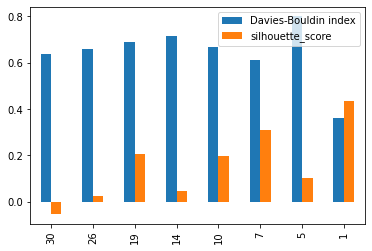

In [56]:
# plot the double histogram

DBScan_PCA.plot.bar()

In [9]:
# performing K-Means Clustering

all_kmeans_indexes = []
for dataset, label in zip(datasets, paths):
    print(label.split("/")[-1].split(".")[0])
    indexes = []
    for n in tqdm.tqdm_notebook(np.arange(3, 12, 2)):
        kmeans = KMeans(int(n))
        #dbscan.fit(dataset)
        pred = kmeans.fit_predict(dataset)
        if max(pred) > 0:
            centers = cl_centers(dataset, pred)

            ind = DB_index(dataset, centers, pred)
            print("shape: ", dataset.shape)
            print("n_clusters: ", n)
            print("Davies-Bouldin index, silhouette_score: ", ind, silhouette_score(dataset, pred))
            print("Classified_samples, classes: ", (pred != -1).sum(), max(pred))
            indexes.append(ind)
        else:
            indexes.append(-1)
    
    all_kmeans_indexes.append(indexes)

proj_o


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


shape:  (14098, 20)
n_clusters:  3
Davies-Bouldin index, silhouette_score:  1.1699301842870309 0.3718085844728106
Classified_samples, classes:  14098 2
shape:  (14098, 20)
n_clusters:  5
Davies-Bouldin index, silhouette_score:  1.208239207816748 0.4091370967679173
Classified_samples, classes:  14098 4
shape:  (14098, 20)
n_clusters:  7
Davies-Bouldin index, silhouette_score:  1.2202171414858125 0.35177527621939825
Classified_samples, classes:  14098 6
shape:  (14098, 20)
n_clusters:  9
Davies-Bouldin index, silhouette_score:  1.4403952127037434 0.31644338160092383
Classified_samples, classes:  14098 8
shape:  (14098, 20)
n_clusters:  11
Davies-Bouldin index, silhouette_score:  1.2865848262489616 0.3267571450524798
Classified_samples, classes:  14098 10

proj_f


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


shape:  (14098, 42)
n_clusters:  3
Davies-Bouldin index, silhouette_score:  1.5310950213213614 0.3417703842700596
Classified_samples, classes:  14098 2
shape:  (14098, 42)
n_clusters:  5
Davies-Bouldin index, silhouette_score:  1.589227586796829 0.258428631891099
Classified_samples, classes:  14098 4
shape:  (14098, 42)
n_clusters:  7
Davies-Bouldin index, silhouette_score:  1.57092859835891 0.2010998045502895
Classified_samples, classes:  14098 6
shape:  (14098, 42)
n_clusters:  9
Davies-Bouldin index, silhouette_score:  1.6636453755790466 0.21287658116054062
Classified_samples, classes:  14098 8
shape:  (14098, 42)
n_clusters:  11
Davies-Bouldin index, silhouette_score:  1.6459147679198687 0.20497898259187636
Classified_samples, classes:  14098 10

proj_g


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


shape:  (14098, 68)
n_clusters:  3
Davies-Bouldin index, silhouette_score:  1.5620427870529408 0.25750998799137387
Classified_samples, classes:  14098 2
shape:  (14098, 68)
n_clusters:  5
Davies-Bouldin index, silhouette_score:  1.655903599993901 0.2529646916892946
Classified_samples, classes:  14098 4
shape:  (14098, 68)
n_clusters:  7
Davies-Bouldin index, silhouette_score:  1.5959541412674352 0.22186108993855733
Classified_samples, classes:  14098 6
shape:  (14098, 68)
n_clusters:  9
Davies-Bouldin index, silhouette_score:  1.6120313095923235 0.21178895436509398
Classified_samples, classes:  14098 8
shape:  (14098, 68)
n_clusters:  11
Davies-Bouldin index, silhouette_score:  1.6479862459733328 0.2097456133334908
Classified_samples, classes:  14098 10

isomap_o_dim5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


shape:  (14098, 5)
n_clusters:  3
Davies-Bouldin index, silhouette_score:  1.0760627025316147 0.3796760718454059
Classified_samples, classes:  14098 2
shape:  (14098, 5)
n_clusters:  5
Davies-Bouldin index, silhouette_score:  0.846401356061618 0.43587536141438255
Classified_samples, classes:  14098 4
shape:  (14098, 5)
n_clusters:  7
Davies-Bouldin index, silhouette_score:  0.8768921527049354 0.38764136972742463
Classified_samples, classes:  14098 6
shape:  (14098, 5)
n_clusters:  9
Davies-Bouldin index, silhouette_score:  0.9263907781396805 0.3666311924176351
Classified_samples, classes:  14098 8
shape:  (14098, 5)
n_clusters:  11
Davies-Bouldin index, silhouette_score:  0.9669355912734052 0.34341887748100075
Classified_samples, classes:  14098 10



In [39]:
# Fill the frame below manually from the output above for O level PCA (DBI, silhouette)

kmeans_pca = pd.DataFrame(data={'2': [1.1699301842870309, 0.3718085844728106], 
                                         '4': [1.208239207816748, 0.4091370967679173],
                                         '6': [1.2202171414858125, 0.35177527621939825],
                                         '8': [1.4403952127037434, 0.31644338160092383],
                                         '10': [1.2865848262489616, 0.3267571450524798]
                                        })

In [40]:
# transpose the indexes matrix

kmeans_pca = kmeans_pca.T

In [41]:
# rename the columns

kmeans_pca.columns = ['Davies-Bouldin index', 'silhouette_score']

In [42]:
kmeans_pca

,Davies-Bouldin index,silhouette_score
2,1.169930,0.371809
4,1.208239,0.409137
6,1.220217,0.351775
8,1.440395,0.316443
10,1.286585,0.326757


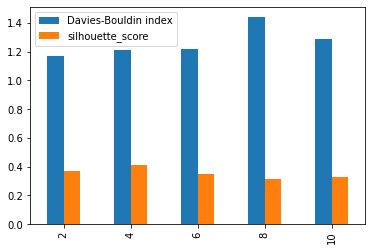

In [43]:
# plot the double histogram

kmeans_pca.plot.bar()

In [10]:
# sample the data via binomial mask

def sample_data(data, fraction):
    mask = np.random.binomial(1, fraction, data.shape[0]).astype(bool)
    return data[mask]

In [11]:
# performing Spectral Clustering

all_spectral_indexes = []
for dataset, label in zip(datasets, paths):
    dataset = sample_data(dataset, 0.3)
    print(label.split("/")[-1].split(".")[0])
    indexes = []
    for n in tqdm.tqdm_notebook(np.arange(3, 12, 2)):
        sp = SpectralClustering(int(n))
        #dbscan.fit(dataset)
        pred = sp.fit_predict(dataset)
        if max(pred) > 0:
            centers = cl_centers(dataset, pred)

            ind = DB_index(dataset, centers, pred)
            print("shape: ", dataset.shape)
            print("n_clusters: ", n)
            print("Davies-Bouldin index, silhouette_score: ", ind, silhouette_score(dataset, pred))
            print("Classified_samples, classes: ", (pred != -1).sum(), max(pred))
            indexes.append(ind)
        else:
            indexes.append(-1)
    
    all_spectral_indexes.append(indexes)

proj_o


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


shape:  (4163, 20)
n_clusters:  3
Davies-Bouldin index, silhouette_score:  1.1662268817735546 0.36507448646833685
Classified_samples, classes:  4163 2
shape:  (4163, 20)
n_clusters:  5
Davies-Bouldin index, silhouette_score:  1.100072229457588 0.39035725962363443
Classified_samples, classes:  4163 4
shape:  (4163, 20)
n_clusters:  7
Davies-Bouldin index, silhouette_score:  1.1106222987519723 0.3910102519079554
Classified_samples, classes:  4163 6
shape:  (4163, 20)
n_clusters:  9
Davies-Bouldin index, silhouette_score:  1.0489991772868632 0.2774640828725896
Classified_samples, classes:  4163 8
shape:  (4163, 20)
n_clusters:  11
Davies-Bouldin index, silhouette_score:  0.8210877595661912 0.25239588365815774
Classified_samples, classes:  4163 10

proj_f


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


shape:  (4284, 42)
n_clusters:  3
Davies-Bouldin index, silhouette_score:  1.4382973561973567 0.25113313537799636
Classified_samples, classes:  4284 2
shape:  (4284, 42)
n_clusters:  5
Davies-Bouldin index, silhouette_score:  1.5410161492570957 0.2536133208572419
Classified_samples, classes:  4284 4
shape:  (4284, 42)
n_clusters:  7
Davies-Bouldin index, silhouette_score:  1.5669354377114277 0.20162267367351602
Classified_samples, classes:  4284 6
shape:  (4284, 42)
n_clusters:  9
Davies-Bouldin index, silhouette_score:  1.4240190911829178 0.21295458890521288
Classified_samples, classes:  4284 8
shape:  (4284, 42)
n_clusters:  11
Davies-Bouldin index, silhouette_score:  1.52459492761175 0.20316752738169175
Classified_samples, classes:  4284 10

proj_g


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


shape:  (4238, 68)
n_clusters:  3
Davies-Bouldin index, silhouette_score:  1.51824497134336 0.26035876356120746
Classified_samples, classes:  4238 2
shape:  (4238, 68)
n_clusters:  5
Davies-Bouldin index, silhouette_score:  1.0908594189740313 0.23947067421859466
Classified_samples, classes:  4238 4
shape:  (4238, 68)
n_clusters:  7
Davies-Bouldin index, silhouette_score:  1.5338181518343947 0.24314589244058413
Classified_samples, classes:  4238 6
shape:  (4238, 68)
n_clusters:  9
Davies-Bouldin index, silhouette_score:  1.5177533539138766 0.1978744656922402
Classified_samples, classes:  4238 8
shape:  (4238, 68)
n_clusters:  11
Davies-Bouldin index, silhouette_score:  1.4545746955218264 0.20514515537418657
Classified_samples, classes:  4238 10

isomap_o_dim5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


shape:  (4235, 5)
n_clusters:  3
Davies-Bouldin index, silhouette_score:  1.0659165362377403 0.3524410689900278
Classified_samples, classes:  4235 2
shape:  (4235, 5)
n_clusters:  5
Davies-Bouldin index, silhouette_score:  0.8965892430705111 0.37786945329085303
Classified_samples, classes:  4235 4
shape:  (4235, 5)
n_clusters:  7
Davies-Bouldin index, silhouette_score:  1.8896144575742349 0.33679499125029205
Classified_samples, classes:  4235 6
shape:  (4235, 5)
n_clusters:  9
Davies-Bouldin index, silhouette_score:  0.9379148540956107 0.304506625828845
Classified_samples, classes:  4235 8
shape:  (4235, 5)
n_clusters:  11
Davies-Bouldin index, silhouette_score:  1.0269801052929095 0.3663782987960501
Classified_samples, classes:  4235 10



In [44]:
# Fill the frame below manually from the output above for O level PCA (DBI, silhouette)

spectral_pca = pd.DataFrame(data={'2': [1.1662268817735546, 0.36507448646833685], 
                                         '4': [1.100072229457588, 0.39035725962363443],
                                         '6': [1.1106222987519723, 0.3910102519079554],
                                         '8': [1.0489991772868632, 0.2774640828725896],
                                         '10': [0.8210877595661912, 0.25239588365815774]
                                        })

In [45]:
# transpose the indexes matrix

spectral_pca = spectral_pca.T

In [46]:
# rename the columns

spectral_pca.columns = ['Davies-Bouldin index', 'silhouette_score']

In [47]:
spectral_pca

,Davies-Bouldin index,silhouette_score
2,1.166227,0.365074
4,1.100072,0.390357
6,1.110622,0.391010
8,1.048999,0.277464
10,0.821088,0.252396


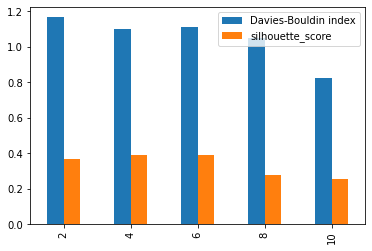

In [48]:
# plot the double histogram

spectral_pca.plot.bar()

In [58]:
# performing DBScan Clustering for Isomap

all_dbscan_indexes = []
dataset = datasets[3]
label = paths[3]
print(label.split("/")[-1].split(".")[0])
indexes = []
for eps in tqdm.tqdm_notebook(np.linspace(0.15, 0.35, 10)):
    dbscan = DBSCAN(eps)
    #dbscan.fit(dataset)
    pred = dbscan.fit_predict(dataset)
    if max(pred) > 0:
        centers = cl_centers(dataset, pred)

        ind = DB_index(dataset, centers, pred)
        print("shape: ", dataset.shape)
        print("dbscan eps: ", eps)
        print("Davies-Bouldin index, silhouette_score: ", ind, silhouette_score(dataset, pred))
        print("Classified_samples, classes: ", (pred != -1).sum(), max(pred))
        indexes.append(ind)
    else:
        indexes.append(-1)
    
all_dbscan_indexes.append(indexes)

isomap_o_dim5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


shape:  (14098, 5)
dbscan eps:  0.15
Davies-Bouldin index, silhouette_score:  0.6652454702826112 -0.16120149037310183
Classified_samples, classes:  13198 40
shape:  (14098, 5)
dbscan eps:  0.17222222222222222
Davies-Bouldin index, silhouette_score:  0.6197954410900869 0.06424393963011733
Classified_samples, classes:  13483 28
shape:  (14098, 5)
dbscan eps:  0.19444444444444442
Davies-Bouldin index, silhouette_score:  0.705049773382125 -0.13528587887694946
Classified_samples, classes:  13695 19
shape:  (14098, 5)
dbscan eps:  0.21666666666666665
Davies-Bouldin index, silhouette_score:  0.6884341169927133 0.06071753634638814
Classified_samples, classes:  13858 9
shape:  (14098, 5)
dbscan eps:  0.23888888888888887
Davies-Bouldin index, silhouette_score:  0.5547528129426172 0.2945397689887204
Classified_samples, classes:  13957 7
shape:  (14098, 5)
dbscan eps:  0.26111111111111107
Davies-Bouldin index, silhouette_score:  0.4999716570674491 0.3654751529866085
Classified_samples, classes:  1

In [6]:
# Fill the frame below manually from the output above for O level Isomap (DBI, silhouette)

DBScan_isomap = pd.DataFrame(data={'40': [0.6652454702826112, -0.16120149037310183], 
                                         '28': [0.6197954410900869, 0.06424393963011733],
                                         '19': [0.705049773382125, -0.13528587887694946],
                                         '9': [0.6884341169927133, 0.06071753634638814],
                                         '7': [0.5547528129426172, 0.2945397689887204],
                                         '2': [0.4999716570674491, 0.3654751529866085],
                                         '1': [0.49903760207843184, 0.3846733626764021]
                                        })

In [7]:
# transpose the indexes matrix

DBScan_isomap = DBScan_isomap.T

In [8]:
# rename the columns

DBScan_isomap.columns = ['Davies-Bouldin index', 'silhouette_score']

In [9]:
DBScan_isomap

,Davies-Bouldin index,silhouette_score
40,0.665245,-0.161201
28,0.619795,0.064244
19,0.705050,-0.135286
9,0.688434,0.060718
7,0.554753,0.294540
2,0.499972,0.365475
1,0.499038,0.384673


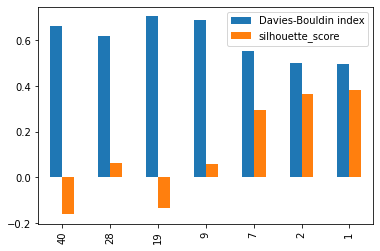

In [68]:
# plot the double histogram

DBScan_isomap.plot.bar()

In [13]:
# performing K-Means Clustering for Isomap

all_kmeans_indexes = []
dataset = datasets[3]
label = paths[3]
print(label.split("/")[-1].split(".")[0])
indexes = []
for n in tqdm.tqdm_notebook(np.arange(3, 12, 2)):
    kmeans = KMeans(int(n))
    #dbscan.fit(dataset)
    pred = kmeans.fit_predict(dataset)
    if max(pred) > 0:
        centers = cl_centers(dataset, pred)

        ind = DB_index(dataset, centers, pred)
        print("shape: ", dataset.shape)
        print("n_clusters: ", n)
        print("Davies-Bouldin index, silhouette_score: ", ind, silhouette_score(dataset, pred))
        print("Classified_samples, classes: ", (pred != -1).sum(), max(pred))
        indexes.append(ind)
    else:
        indexes.append(-1)
    
all_kmeans_indexes.append(indexes)

isomap_o_dim5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


shape:  (14098, 5)
n_clusters:  3
Davies-Bouldin index, silhouette_score:  1.0755912317306053 0.37962158807768137
Classified_samples, classes:  14098 2
shape:  (14098, 5)
n_clusters:  5
Davies-Bouldin index, silhouette_score:  0.846401356061618 0.43587536141438255
Classified_samples, classes:  14098 4
shape:  (14098, 5)
n_clusters:  7
Davies-Bouldin index, silhouette_score:  0.8768891716193483 0.38765041744080414
Classified_samples, classes:  14098 6
shape:  (14098, 5)
n_clusters:  9
Davies-Bouldin index, silhouette_score:  0.9279348308375186 0.3662763355444997
Classified_samples, classes:  14098 8
shape:  (14098, 5)
n_clusters:  11
Davies-Bouldin index, silhouette_score:  0.967134582995433 0.3450890183901615
Classified_samples, classes:  14098 10



In [29]:
# Fill the frame below manually from the output above for O level Isomap (DBI, silhouette)

kmeans_isomap = pd.DataFrame(data={'2': [1.0755912317306053, 0.37962158807768137], 
                                         '4': [0.846401356061618, 0.43587536141438255],
                                         '6': [0.8768891716193483, 0.38765041744080414],
                                         '8': [0.9279348308375186, 0.3662763355444997],
                                         '10': [0.967134582995433, 0.3450890183901615]
                                        })

In [30]:
# transpose the indexes matrix

kmeans_isomap = kmeans_isomap.T

In [31]:
# rename the columns

kmeans_isomap.columns = ['Davies-Bouldin index', 'silhouette_score']

In [32]:
kmeans_isomap

,Davies-Bouldin index,silhouette_score
2,1.075591,0.379622
4,0.846401,0.435875
6,0.876889,0.387650
8,0.927935,0.366276
10,0.967135,0.345089


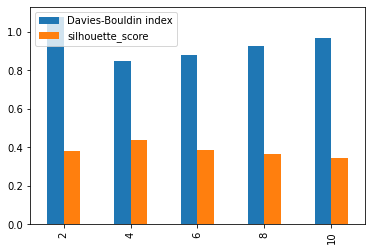

In [33]:
# plot the double histogram

kmeans_isomap.plot.bar()

In [16]:
# sample the data via binomial mask

def sample_data(data, fraction):
    mask = np.random.binomial(1, fraction, data.shape[0]).astype(bool)
    return data[mask]

In [17]:
# performing Spectral Clustering for Isomap

all_spectral_indexes = []
dataset = datasets[3]
label = paths[3]
dataset = sample_data(dataset, 0.3)
print(label.split("/")[-1].split(".")[0])
indexes = []
for n in tqdm.tqdm_notebook(np.arange(3, 12, 2)):
    sp = SpectralClustering(int(n))
    #dbscan.fit(dataset)
    pred = sp.fit_predict(dataset)
    if max(pred) > 0:
        centers = cl_centers(dataset, pred)

        ind = DB_index(dataset, centers, pred)
        print("shape: ", dataset.shape)
        print("n_clusters: ", n)
        print("Davies-Bouldin index, silhouette_score: ", ind, silhouette_score(dataset, pred))
        print("Classified_samples, classes: ", (pred != -1).sum(), max(pred))
        indexes.append(ind)
    else:
        indexes.append(-1)
    
all_spectral_indexes.append(indexes)

isomap_o_dim5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


shape:  (4250, 5)
n_clusters:  3
Davies-Bouldin index, silhouette_score:  0.5516035017334805 0.5597466004441564
Classified_samples, classes:  4250 2
shape:  (4250, 5)
n_clusters:  5
Davies-Bouldin index, silhouette_score:  0.8474007262037478 0.3732162992020442
Classified_samples, classes:  4250 4
shape:  (4250, 5)
n_clusters:  7
Davies-Bouldin index, silhouette_score:  0.9627899307378939 0.375414209035086
Classified_samples, classes:  4250 6
shape:  (4250, 5)
n_clusters:  9
Davies-Bouldin index, silhouette_score:  1.6408166881861965 0.33573495299862394
Classified_samples, classes:  4250 8
shape:  (4250, 5)
n_clusters:  11
Davies-Bouldin index, silhouette_score:  1.327452327525305 0.3616299371681999
Classified_samples, classes:  4250 10



In [18]:
# Fill the frame below manually from the output above for O level Isomap (DBI, silhouette)

spectral_isomap = pd.DataFrame(data={'2': [0.5516035017334805, 0.5597466004441564], 
                                         '4': [0.8474007262037478, 0.3732162992020442],
                                         '6': [0.9627899307378939, 0.375414209035086],
                                         '8': [1.6408166881861965, 0.33573495299862394],
                                         '10': [1.327452327525305, 0.3616299371681999]
                                        })

In [19]:
spectral_isomap

,2,4,6,8,10
0,0.551604,0.847401,0.962790,1.640817,1.327452
1,0.559747,0.373216,0.375414,0.335735,0.361630


In [20]:
# transpose the indexes matrix

spectral_isomap = spectral_isomap.T

In [21]:
# rename the columns

spectral_isomap.columns = ['Davies-Bouldin index', 'silhouette_score']

In [22]:
spectral_isomap

,Davies-Bouldin index,silhouette_score
2,0.551604,0.559747
4,0.847401,0.373216
6,0.962790,0.375414
8,1.640817,0.335735
10,1.327452,0.361630


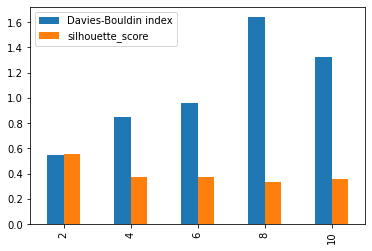

In [23]:
# plot the double histogram

spectral_isomap.plot.bar()

## The code below should be replaced by the automatic recalculation of the indexes data frames. Data from PCA and Isomap indexes frames should be reorganized to two alternitive frames with DBI and Silhoutte indexes as columns

In [12]:
# Fill the frames below with the data from the previous PCA and Isomap frames

DBI_spectral_isomap_pca = pd.DataFrame(data={'2': [0.5516035017334805, 1.1662268817735546],
                                         '4': [0.8474007262037478, 1.100072229457588],
                                         '6': [0.9627899307378939, 1.1106222987519723],
                                         '8': [1.6408166881861965, 1.0489991772868632],
                                         '10': [1.327452327525305, 0.8210877595661912],
                                        })

slh_spectral_isomap_pca = pd.DataFrame(data={'2': [0.5597466004441564, 0.36507448646833685], 
                                         '4': [0.3732162992020442, 0.39035725962363443],
                                         '6': [0.375414209035086, 0.3910102519079554],
                                         '8': [0.33573495299862394, 0.2774640828725896],
                                         '10': [0.3616299371681999, 0.25239588365815774]
                                        })

In [13]:
# transpose the indexes matrices

DBI_spectral_isomap_pca = DBI_spectral_isomap_pca.T
slh_spectral_isomap_pca = slh_spectral_isomap_pca.T

In [16]:
# rename the columns

DBI_spectral_isomap_pca.columns = ['Isomap', 'PCA']
slh_spectral_isomap_pca.columns = ['Isomap', 'PCA']

In [17]:
slh_spectral_isomap_pca

,Isomap,PCA
2,0.559747,0.365074
4,0.373216,0.390357
6,0.375414,0.391010
8,0.335735,0.277464
10,0.361630,0.252396


In [18]:
DBI_spectral_isomap_pca

,Isomap,PCA
2,0.551604,1.166227
4,0.847401,1.100072
6,0.962790,1.110622
8,1.640817,1.048999
10,1.327452,0.821088


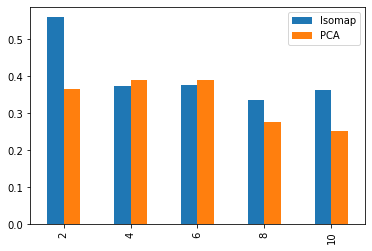

In [19]:
# plot the double histogram

slh_spectral_isomap_pca.plot.bar()

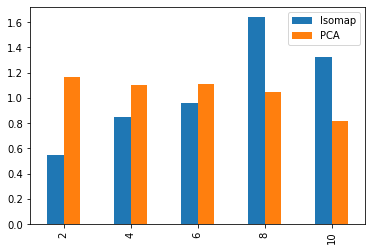

In [20]:
# plot the double histogram

DBI_spectral_isomap_pca.plot.bar()

In [21]:
# Fill the frames below with the data from the previous PCA and Isomap frames

DBI_kmeans_isomap_pca = pd.DataFrame(data={'2': [1.0755912317306053, 1.1699301842870309],
                                         '4': [0.846401356061618, 1.208239207816748],
                                         '6': [0.8768891716193483, 1.2202171414858125],
                                         '8': [0.9279348308375186, 1.4403952127037434],
                                         '10': [0.967134582995433, 1.2865848262489616]
                                        })

slh_kmeans_isomap_pca = pd.DataFrame(data={'2': [0.37962158807768137, 0.3718085844728106], 
                                         '4': [0.43587536141438255, 0.4091370967679173],
                                         '6': [0.38765041744080414, 0.35177527621939825],
                                         '8': [0.3662763355444997, 0.31644338160092383],
                                         '10': [0.3450890183901615, 0.3267571450524798]
                                        })

In [22]:
# transpose the indexes matrices

DBI_kmeans_isomap_pca = DBI_kmeans_isomap_pca.T
slh_kmeans_isomap_pca = slh_kmeans_isomap_pca.T

In [23]:
# rename the columns

DBI_kmeans_isomap_pca.columns = ['Isomap', 'PCA']
slh_kmeans_isomap_pca.columns = ['Isomap', 'PCA']

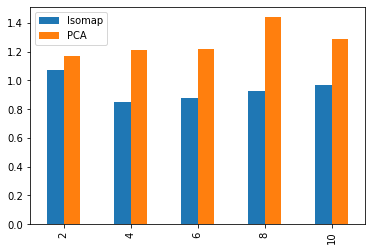

In [24]:
# plot the double histogram

DBI_kmeans_isomap_pca.plot.bar()

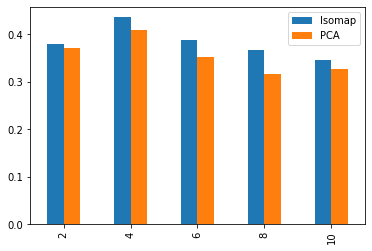

In [25]:
# plot the double histogram

slh_kmeans_isomap_pca.plot.bar()